Convolutie is vooral handig in situaties waar we patronen of kenmerken in data willen detecteren, zoals in afbeeldingen, geluidsgolven of tijdreeksen. In beeldverwerking worden convolutionele lagen vaak gebruikt in neurale netwerken om visuele kenmerken zoals randen, texturen, en vormen te herkennen. Deze techniek is krachtig omdat het in staat is om belangrijke informatie uit complexe data te extraheren terwijl irrelevante details worden genegeerd, wat leidt tot efficiëntere en nauwkeurigere modellen voor taken zoals objectherkenning, gezichtsherkenning, en beeldclassificatie.

Een kernel is meestal een kleine matrix, vaak 3x3, 5x5, of 7x7, met numerieke waarden (gewichten) die tijdens het trainingsproces worden geleerd. De waarden in de kernel bepalen welke kenmerken de convolutie-operatie uit de invoerafbeelding zal halen.

De parameter strides=(1, 1) in een convolutionele laag definieert de stapgrootte waarmee de convolutionele kernel (of filter) over de invoerafbeelding beweegt. Specifiek geeft het aan hoeveel pixels de kernel bij elke stap horizontaal (over de breedte) en verticaal (over de hoogte) verschuift.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


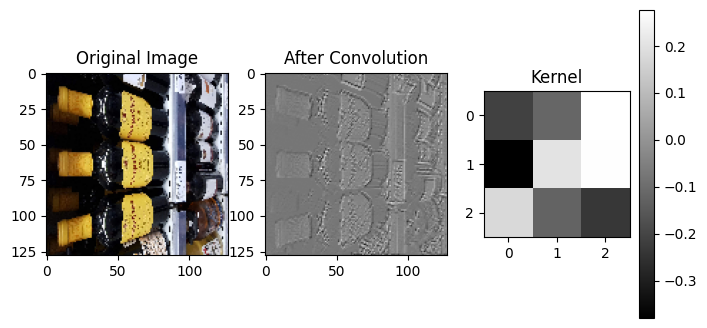

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#uncomment als je vanaf drive runt
#from google.colab import drive
#drive.mount('/content/drive')

# Change directory to where the notebook and image are located
#%cd /content/drive/My Drive/Colab Notebooks

# Load and preprocess the image
img_path = 'wine.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image data to range [0, 1]
img_array = img_array / 255.0

# Define a simple model with one Conv2D layer
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(128, 128, 3))
model = tf.keras.Sequential([conv_layer])



# Apply the convolution
conv_output = model.predict(img_array)

# Extract the kernel weights
kernel_weights = conv_layer.get_weights()[0]

# Display the original image
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_array[0])

# Display the convoluted image
plt.subplot(1, 3, 2)
plt.title("After Convolution")
# Remove the batch dimension and the channel dimension
plt.imshow(conv_output[0, :, :, 0], cmap='gray')

# Visualize the kernel
plt.subplot(1, 3, 3)
plt.title("Kernel")
plt.imshow(kernel_weights[:, :, 0, 0], cmap='gray')
plt.colorbar()

plt.show()


Laden en Voorbewerken van de Afbeelding:

    De afbeelding wordt geladen en aangepast naar een formaat van 128x128 pixels.
    De afbeelding wordt omgezet naar een array en genormaliseerd naar het bereik [0, 1].
    De array wordt uitgebreid met een batchdimensie, zoals vereist door TensorFlow-modellen.

Convolutionele Laag:

    Een eenvoudig model met een enkele convolutionele laag wordt gedefinieerd met behulp van tf.keras.Sequential.
    De convolutionele laag (Conv2D) gebruikt één filter, een kernelgrootte van 3x3, en een stride van 1x1.

Weergave van de Resultaten:

    De originele afbeelding en de geconvolueerde afbeelding worden naast elkaar weergegeven.
    De geconvolueerde afbeelding wordt weergegeven in grijstinten met behulp van cmap='gray'.